1. Probability Distributions


Poisson Distribution
Models the count of events that occur in a fixed interval.

What It Models: The number of events in a fixed interval of time or space.
Examples:

Number of emails received in an hour.
Number of customers arriving at a store in a day.

Key Characteristic: Events occur independently and randomly.
​

k: Number of events.

λ: Average rate of events.

Intuition: If you expect 4 emails per hour (λ=4), the Poisson distribution tells you how likely it is to receive exactly 2, 3, or 5 emails."

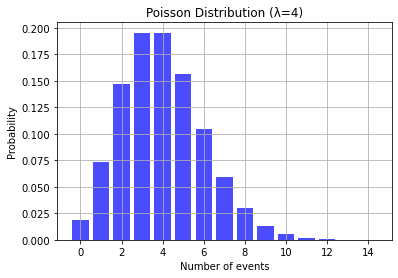

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_param = 4  # Average number of events per interval

# Generate Poisson probabilities
x = np.arange(0, 15)  # Values from 0 to 15
y = poisson.pmf(x, lambda_param)

# Plot
plt.bar(x, y, alpha=0.7, color="blue")
plt.title("Poisson Distribution (λ=4)")
plt.xlabel("Number of events")
plt.ylabel("Probability")
plt.grid()
plt.show()


Exponential Distribution

What It Models: The time between events in a Poisson process.
Examples:

Time between two emails arriving.

Time between buses arriving at a station.

Key Characteristic: Events happen continuously and independently.

x: Time between events.

λ: Rate parameter (average number of events per unit time).

Intuition: If the average time between buses is 10 minutes (λ=0.1), the exponential distribution tells you the probability of waiting exactly 5 or 15 minutes.

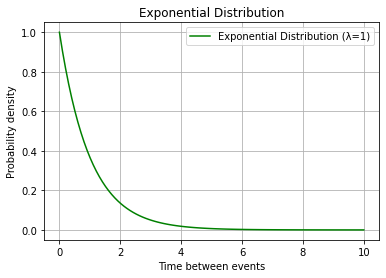

In [13]:
from scipy.stats import expon

# Parameters
lambda_param = 1  # Rate parameter (1/mean)

# Generate data
x = np.linspace(0, 10, 100)
y = expon.pdf(x, scale=1/lambda_param)

# Plot
plt.plot(x, y, label="Exponential Distribution (λ=1)", color="green")
plt.title("Exponential Distribution")
plt.xlabel("Time between events")
plt.ylabel("Probability density")
plt.grid()
plt.legend()
plt.show()


Gamma Distribution


What It Models: The time it takes for multiple events to occur in a Poisson process.

Examples:

Time until the 3rd email arrives.

Time until the 5th customer enters a store.

Key Characteristic: Generalizes the exponential distribution (which models time for 1 event).

k: Number of events.

θ: Average time between events.

Intuition: If you’re waiting for 3 buses to arrive, the gamma distribution tells you the likelihood of waiting for exactly 30 or 50 minutes.

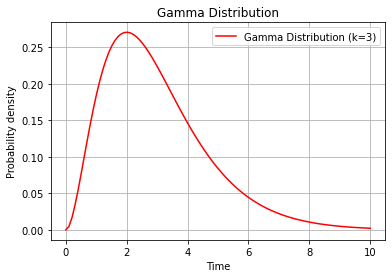

In [14]:
from scipy.stats import gamma

# Parameters
shape_param = 3  # Number of events
scale_param = 1  # Scale (inverse of rate)

# Generate data
x = np.linspace(0, 10, 100)
y = gamma.pdf(x, a=shape_param, scale=scale_param)

# Plot
plt.plot(x, y, label="Gamma Distribution (k=3)", color="red")
plt.title("Gamma Distribution")
plt.xlabel("Time")
plt.ylabel("Probability density")
plt.grid()
plt.legend()
plt.show()


2. Markov Chains
A Markov Chain is a mathematical model for a process where the next state depends only on the current state (not past states).


Key Components:

States: The possible outcomes (e.g., "Sunny" or "Rainy").

Transition Probabilities: The probabilities of moving from one state to another.

Key Properties:

Markov Property: The next state depends only on the current state, not the history.

Transition Matrix: A table that shows the probabilities of moving from one state to another.



Basic Markov Chain Example: Example: Weather Prediction
Imagine predicting tomorrow's weather based on today's weather:


States: "Sunny" (S) and "Rainy" (R).

P(S→S)=0.8: Probability of staying sunny.

P(S→R)=0.2: Probability of switching to rainy.

Simulation: By starting in "Sunny" and following the transitions, you can generate a sequence of weather predictions.

In [15]:
import numpy as np

# Define states and transition matrix
states = ["Sunny", "Rainy"]
transition_matrix = np.array([[0.8, 0.2],
                               [0.4, 0.6]])

# Simulate Markov chain
def simulate_markov_chain(steps, start_state):
    current_state = start_state
    sequence = [states[current_state]]

    for _ in range(steps):
        current_state = np.random.choice([0, 1], p=transition_matrix[current_state])
        sequence.append(states[current_state])

    return sequence

# Simulate
start_state = 0  # Start with "Sunny"
steps = 10
sequence = simulate_markov_chain(steps, start_state)
print("Weather sequence:", sequence)


Weather sequence: ['Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny']


Applications of Markov Chains: Text Generation with Markov Chains

Text Generation:
Use a Markov Chain to predict the next word based on the current word.

Example: Generate sentences like, "I am happy" → "happy I am."



In [16]:
# Define transitions for a simple text model
transition_dict = {
    "I": {"am": 0.5, "like": 0.5},
    "am": {"happy": 0.8, "sad": 0.2},
    "like": {"coding": 1.0},
    "happy": {"I": 1.0},
    "sad": {"I": 1.0},
    "coding": {"I": 1.0},
}

# Generate text using Markov Chain
def generate_text(start_word, num_words):
    current_word = start_word
    sentence = [current_word]

    for _ in range(num_words - 1):
        next_word_choices = transition_dict.get(current_word, {})
        if not next_word_choices:
            break
        current_word = np.random.choice(
            list(next_word_choices.keys()), 
            p=list(next_word_choices.values())
        )
        sentence.append(current_word)

    return " ".join(sentence)

# Generate text
print("Generated Text:", generate_text("I", 9))



Generated Text: I am sad I like coding I am sad
